In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
#%matplotlib notebook

from numpy.linalg import inv
from numpy import linalg as LA
from scipy import linalg
import random

from matplotlib import animation, rc
from IPython.display import HTML

Using TensorFlow backend.


In [2]:
df = pd.read_csv('training_data.csv')

In [3]:
FM = df.values
dim = np.shape(FM)

In [7]:
x = np.linspace(0,1,n_nodes)

In [25]:
#ignore rotations and moments

F = FM[:,0:int(dim[1]/2)]
F = F[:,0::2]
F = F/F.max()
D = FM[:,int(dim[1]/2):] 
D = D[:,0::2]
print(D.max())
D = D/D.max()


0.27164


In [6]:
#Training data

n_timesteps, n_nodes = np.shape(D)
d = 10 #number of steps in "model memory"
t = d

X_train = np.zeros([n_timesteps-d, d*n_nodes+n_nodes])
Y_train = np.zeros([n_timesteps-d, n_nodes])


for i in range(n_timesteps-d):
    
    bulk = 0
    for j in range(n_nodes):
        X_train[i, bulk:bulk + d+1] = F[t-d:t+1,j]    
        bulk += d+1
    
    #for j in range(n_nodes):
    #    X_train[i, bulk:bulk + d] = D[t-d:t,j]
     #   bulk += d
    
    #for j in range(n_nodes):
     #   X_train[i, bulk: bulk + d] = Dt[t-d:t,j]/rt_max
      #  bulk += d

    Y_train[i, 0:n_nodes] = D[t, :]
    #Y_train[i, n_nodes:] = Dt[i, :]/rt_max
    t += 1


In [8]:
#Neural network

train_portion = 0.8
input_dim = len(X_train[0,:])
output_dim = len(Y_train[0,:])

x_train = X_train[0:int(n_timesteps*train_portion),:]
x_test = X_train[int(n_timesteps*(train_portion)):,:]
y_train = Y_train[0:int(n_timesteps*train_portion),:]
y_test = Y_train[int(n_timesteps*(train_portion)):,:]

def baseline_model():
    model = Sequential()
    height = 200
    model.add(Dense(height, input_dim=input_dim, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(output_dim, input_dim=height, activation='linear', kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer="adam")
    return model



# Training the model
model = baseline_model()
model.fit(x_train, y_train, epochs=100, verbose = 1)

Epoch 1/100
15203/15203 [==============================] - 2s 125us/step - loss: 0.0022
Epoch 2/100
15203/15203 [==============================] - 2s 109us/step - loss: 8.0474e-04
Epoch 3/100
15203/15203 [==============================] - 2s 126us/step - loss: 7.6571e-04
Epoch 4/100
15203/15203 [==============================] - 2s 105us/step - loss: 6.4583e-04
Epoch 5/100
15203/15203 [==============================] - 2s 105us/step - loss: 6.6053e-04
Epoch 6/100
15203/15203 [==============================] - 2s 126us/step - loss: 5.7149e-04
Epoch 7/100
15203/15203 [==============================] - 2s 106us/step - loss: 5.6707e-04
Epoch 8/100
15203/15203 [==============================] - 1s 83us/step - loss: 5.2773e-04
Epoch 9/100
15203/15203 [==============================] - 2s 110us/step - loss: 4.7124e-04
Epoch 10/100
15203/15203 [==============================] - 1s 95us/step - loss: 4.6157e-04
Epoch 11/100
15203/15203 [==============================] - 1s 87us/step - loss: 3.90

15203/15203 [==============================] - 3s 213us/step - loss: 0.0018
Epoch 89/100
15203/15203 [==============================] - 2s 163us/step - loss: 1.6683e-04
Epoch 90/100
15203/15203 [==============================] - 2s 109us/step - loss: 1.0787e-04
Epoch 91/100
15203/15203 [==============================] - 2s 100us/step - loss: 8.6240e-05
Epoch 92/100
15203/15203 [==============================] - 1s 94us/step - loss: 7.6965e-05
Epoch 93/100
15203/15203 [==============================] - 1s 97us/step - loss: 1.1017e-04
Epoch 94/100
15203/15203 [==============================] - 1s 91us/step - loss: 8.0783e-05
Epoch 95/100
15203/15203 [==============================] - 1s 92us/step - loss: 8.9933e-05
Epoch 96/100
15203/15203 [==============================] - 1s 92us/step - loss: 8.6830e-05
Epoch 97/100
15203/15203 [==============================] - 1s 90us/step - loss: 8.2683e-05
Epoch 98/100
15203/15203 [==============================] - 1s 92us/step - loss: 8.4810e-05
E

In [9]:
predictions = model.predict(x_test)

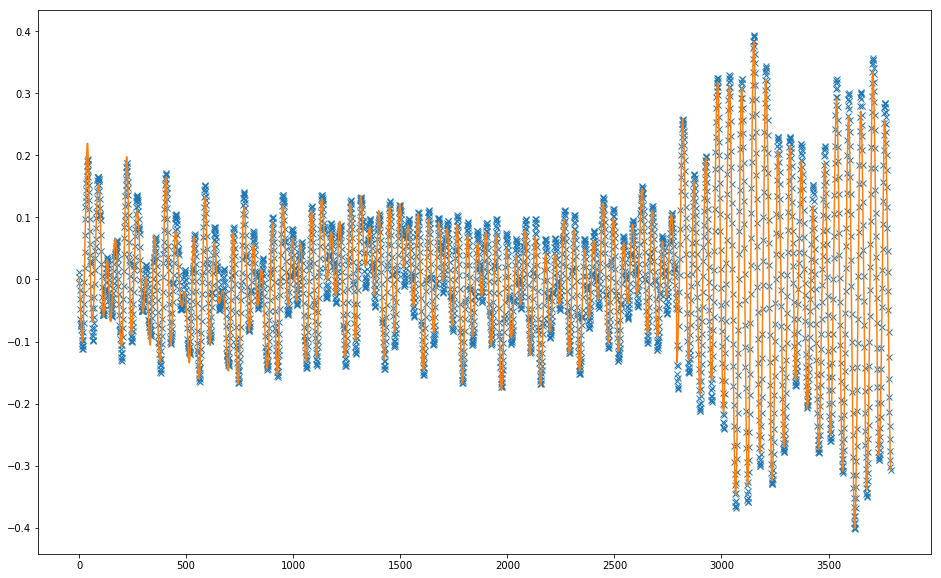

In [10]:
plt.figure(figsize=(16,10))
plt.plot(predictions[:,n_nodes-1], 'x')
plt.plot(y_test[:, n_nodes-1])
plt.show()

In [11]:
#Errorfunction
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [12]:
#Error
print(rmse(predictions[:,n_nodes-1], y_test[:,n_nodes-1]))

0.0159923836004


In [13]:
#Total error
error = 0
for i in range(len(predictions[:,0])):
    error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)

print(error)

0.413014601447


In [21]:
#independent prediction

input_i = np.copy(x_train[0,:])

#dz = np.copy(input_i[(d+1)*n_nodes:])

#dz = np.reshape(dz, (n_nodes, d))


#dzt = np.copy(input_i[d+1+n_nodes*d:])
#dzt = np.reshape(dzt, (n_nodes, d))

preds = np.zeros([len(x_train[:,0])-1, n_nodes])
force = np.copy(x_train[:, 0:(d+1)*n_nodes])

for i in range(len(x_train[:,0])-1):
    
    
    pred = model.predict(np.reshape(input_i,(1,len(input_i))))
    preds[i, :] = pred
    
    input_i[0:(d+1)*n_nodes] = force[i+1,:]
    
    #dz = np.delete(dz, 0, 1)
    #dz = np.concatenate((dz, np.reshape(pred[0,:], (1,n_nodes)).T), axis=1)
    #dz[0,:] = np.zeros(d)
    #dzt = np.delete(dzt, 0, 1)
    #dzt = np.concatenate((dzt, np.reshape(pred[0,n_nodes:], (1, n_nodes)).T), axis=1)
    #dzt[0,:] = np.zeros(n_nodes)
    #input_i[(d+1)*n_nodes:] = np.reshape(dz, (1, n_nodes*d))[0]
    #input_i[d+1+n_nodes*d:] = np.reshape(dzt, (1, n_nodes*d))[0]
    

    

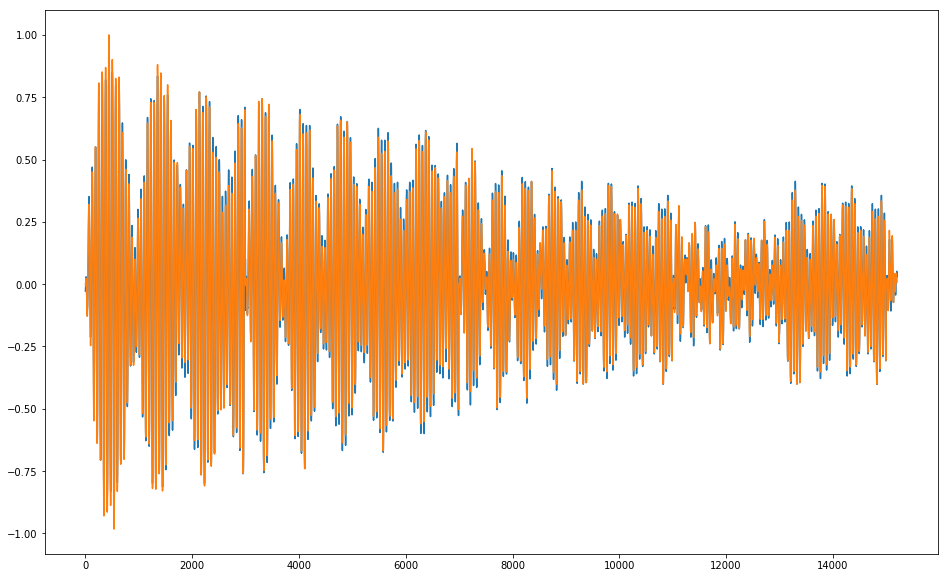

In [23]:
plt.figure(figsize=(16,10))
plt.plot(preds[:,n_nodes-1], '-')
plt.plot(y_train[:, n_nodes-1])
plt.show()

In [18]:
#Error
print(rmse(preds[:,n_nodes-1], y_test[:-1,n_nodes-1]))

0.0159944760886


In [19]:
#Total error
error = 0
for i in range(len(preds[:,0])):
    error += np.trapz((y_test[i,:] - preds[i,:])**2, x)

print(error)

0.412994945016


In [20]:
#Export results
np.savetxt("predictions.csv", predictions, delimiter=",")
np.savetxt("preds.csv", preds, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")